## Capstone Project - India Crime Phase 4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's

In [18]:
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8597 non-null   object
 1   DISTRICT                                             8597 non-null   object
 2   YEAR                                                 8597 non-null   int64 
 3   MURDER                                               8597 non-null   int64 
 4   ATTEMPT TO MURDER                                    8597 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8597 non-null   int64 
 6   RAPE                                                 8597 non-null   int64 
 7   CUSTODIAL RAPE                                       8597 non-null   int64 
 8   OTHER RAPE                                           8597 non-null   int64 
 9

In [20]:
df['DISTRICT'].value_counts()

G.R.P.             46
SOUTH              37
NORTH              37
WEST               36
RAILWAYS           35
                   ..
RAILWAYS KMR        1
MIDNAPUR            1
KAWARDHA            1
A and N ISLANDS     1
CAR                 1
Name: DISTRICT, Length: 806, dtype: int64

In [21]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,...,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000
mean,2006.635338,46.823659,40.941840,5.189485,27.816331,0.003024,27.813307,41.509480,30.697569,10.811911,...,13.226009,392.215424,10.608584,52.710829,14.429917,101.803071,0.103757,116.536466,1140.261603,2784.768408
std,3.464064,42.755817,50.589877,9.948005,30.897866,0.079201,30.893890,56.062152,42.502686,21.318741,...,30.415132,559.583270,14.186601,64.912227,43.144466,180.073942,1.433148,155.590836,1438.819352,3068.017393
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,9.000000,6.000000,1.000000,...,2.000000,40.000000,1.000000,9.000000,0.000000,11.000000,0.000000,5.000000,255.000000,835.000000
50%,2007.000000,37.000000,27.000000,2.000000,19.000000,0.000000,19.000000,24.000000,17.000000,5.000000,...,8.000000,191.000000,5.000000,30.000000,2.000000,46.000000,0.000000,65.000000,715.000000,2011.000000
75%,2010.000000,63.000000,54.000000,5.000000,39.000000,0.000000,39.000000,52.000000,39.000000,12.000000,...,18.000000,490.000000,15.000000,71.000000,12.000000,126.000000,0.000000,166.000000,1528.000000,3789.000000
max,2012.000000,542.000000,741.000000,241.000000,568.000000,5.000000,568.000000,587.000000,492.000000,484.000000,...,2350.000000,4837.000000,168.000000,621.000000,1257.000000,3035.000000,60.000000,2058.000000,32452.000000,34638.000000


In [22]:
group_state = df.groupby('STATE/UT')

In [23]:
group_state.first()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,2,...,4,113,0,18,1,9,0,0,310,637
ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,...,30,1131,16,149,34,175,0,181,1518,4154
ARUNACHAL PRADESH,CHANGLANG,2001,11,2,0,1,0,1,3,2,...,1,30,0,3,0,0,0,0,54,163
ASSAM,BARPETA,2001,64,5,0,28,0,28,105,88,...,38,266,10,29,0,95,0,87,430,1778
BIHAR,ARARIA,2001,47,27,4,93,0,93,79,13,...,3,10,11,3,0,50,0,26,944,2069
CHANDIGARH,CHANDIGARH,2001,15,10,6,18,0,18,56,50,...,5,95,3,24,15,36,0,6,914,3397
CHHATTISGARH,BALRAMPUR,2001,13,2,0,17,0,17,1,1,...,2,30,1,18,0,7,0,7,40,235
D & N HAVELI,D and N HAVELI,2001,3,2,0,6,0,6,4,2,...,1,29,0,7,0,4,0,0,183,350
DAMAN & DIU,DAMAN,2001,6,5,0,0,0,0,5,3,...,3,18,0,0,0,4,0,0,54,194


In [24]:
group_state.max()

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,SOUTH,2012,16,19,4,23,0,23,16,14,...,15,113,2,31,10,25,0,9,479,956
ANDHRA PRADESH,WEST GODAVARI,2012,214,248,31,130,1,130,172,148,...,124,4837,62,419,1257,1420,7,2058,3719,20252
ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2012,17,14,4,13,0,13,23,17,...,19,84,1,25,6,9,0,28,155,576
ASSAM,UDALGURI,2012,143,129,71,181,3,179,386,358,...,2350,969,29,250,10,875,2,506,5253,10545
BIHAR,VAISHALI,2012,542,741,92,219,1,219,376,300,...,137,4157,168,202,29,377,48,781,9061,14491
CHANDIGARH,CHANDIGARH,2012,31,44,10,33,0,33,87,66,...,9,107,10,45,28,112,0,15,1111,3931
CHHATTISGARH,SURAJPUR,2012,139,181,27,159,0,159,115,86,...,59,3161,30,291,53,231,2,556,7724,11218
D & N HAVELI,D and N HAVELI,2012,14,5,1,7,0,7,18,14,...,12,35,1,11,2,5,0,24,195,442
DAMAN & DIU,DIU,2012,12,6,1,5,0,5,5,3,...,10,18,1,4,1,5,0,36,69,243


In [26]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

In [27]:
from sklearn.cluster import KMeans

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)

[[-1.62689402  1.26718411  0.37674076 ...  0.41433856  0.26254885
   0.44631795]
 [-1.62689402  2.43668365  1.66165752 ...  0.98638495 -0.26847295
   0.43686504]
 [-1.62689402  1.26718411  0.3174369  ...  1.84766829  0.08461485
   0.9887193 ]
 ...
 [ 1.54875126 -1.09520497 -0.80933626 ... -0.74903669 -0.77030244
  -0.88817192]
 [ 1.54875126 -0.97825501 -0.69072856 ... -0.46622723 -0.52008275
  -0.65119729]
 [ 1.54875126 -0.53384519 -0.39420931 ...  0.65858309  0.36680706
   0.2311828 ]]


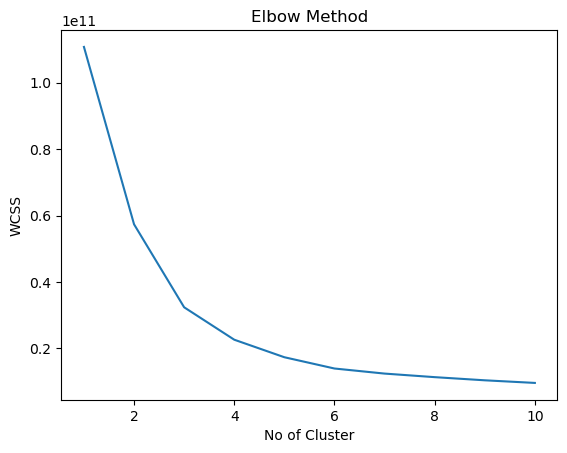

In [29]:
wcss=[] #within cluster sum of square distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [31]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [32]:
y_kmeans = kmeans.fit_predict(df1)

y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

In [33]:
y_kmeans1=y_kmeans+1

In [34]:
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [35]:
#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
cluster,,,,,,,,,,,,,,,,,,,,,
1,2006.5,30.4,24.9,3.2,17.7,0.0,17.7,22.8,17.5,5.3,...,8.5,220.5,6.0,32.5,6.9,49.7,0.1,68.1,694.7,1591.1
2,2007.6,175.2,172.5,17.4,92.3,0.0,92.3,214.5,132.9,81.6,...,22.3,2127.1,35.9,191.3,84.3,693.2,0.6,471.4,5691.8,17908.2
3,2006.9,85.7,78.6,10.1,52.6,0.0,52.6,84.4,62.0,22.3,...,25.8,777.4,22.1,101.5,31.7,215.2,0.2,232.5,2137.3,5300.4


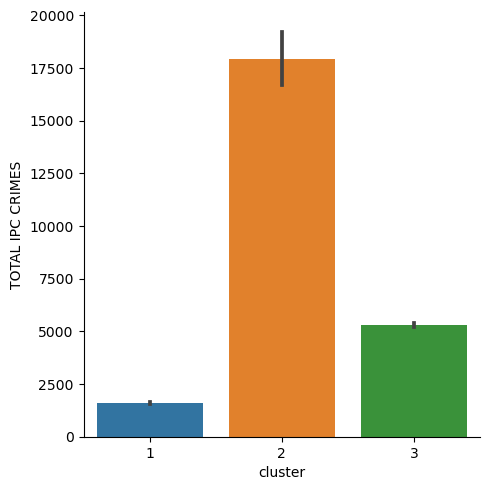

In [37]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar')

<AxesSubplot:xlabel='MURDER', ylabel='ATTEMPT TO MURDER'>

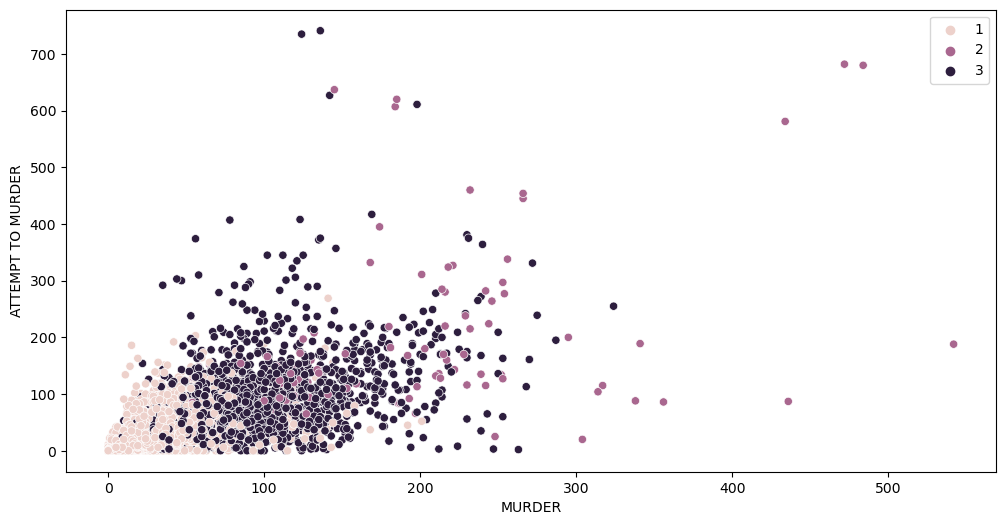

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['MURDER'], y = df['ATTEMPT TO MURDER'],hue=y_kmeans1)

In [39]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

In [40]:
data3.groupby('DISTRICT').max()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2012,204,108,80,231,0,231,497,338,...,349,74,196,5,1860,3,113,6062,11765,3
24 PARGANAS SOUTH,WEST BENGAL,2012,263,123,75,308,0,308,419,419,...,390,68,205,4,2879,2,131,7641,15299,3
ADILABAD,ANDHRA PRADESH,2012,113,94,17,88,0,88,96,72,...,2172,22,192,163,498,0,400,2265,6122,3
AGRA,UTTAR PRADESH,2010,158,190,55,66,0,66,252,212,...,573,83,133,162,479,0,591,2085,6925,3
AHMEDABAD COMMR.,GUJARAT,2001,90,58,60,39,0,39,143,117,...,1311,7,54,27,530,0,0,6129,13496,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WARANGAL URBAN,ANDHRA PRADESH,2011,46,10,5,35,0,35,55,15,...,499,26,78,54,63,0,230,1730,3797,3
WARDHA,MAHARASHTRA,2010,41,29,5,44,0,44,26,22,...,744,2,119,57,93,0,205,1197,3882,3
WEST,TRIPURA,2012,83,72,19,118,0,118,454,256,...,609,27,122,19,431,0,307,4151,7690,3


In [41]:
sensitivearea=df[df['cluster']==2]

In [42]:
peacefularea=df[df['cluster']==1]

In [43]:
moderatearea=df[df['cluster']==3] 

4.2 Create DataFrame for each cluster that shows data according to the areas.
Created 3 datafrmes as per the cluster value and named them as mentioned below.

Sensitivearea- (cluster 2)

moderatearea (cluster 3)

peacefularea (clsuter 1)

In [44]:
kmeans.cluster_centers_

array([[-0.03402362, -0.38442164, -0.31771235, -0.20183505, -0.32886296,
        -0.02198357, -0.32884892, -0.3339592 , -0.25777413, -0.23267514,
        -0.12816407, -0.2694449 , -0.28600664, -0.26491169, -0.24385635,
        -0.24781197, -0.27538527, -0.26238743, -0.25076312, -0.16318727,
        -0.15394207, -0.3069216 , -0.32445524, -0.31175205, -0.3099946 ,
        -0.38929632],
       [ 0.28237476,  3.00177797,  2.60138269,  1.22446371,  2.08719726,
         0.06792015,  2.08729172,  3.08564636,  3.31931584,  2.04895035,
         2.47283715,  4.83905977,  4.69027927,  5.71973691,  5.29737543,
         5.32495996,  2.01523175,  4.85594523,  5.279295  ,  4.06428474,
         0.29705676,  3.10045208,  1.78340467,  2.28101058,  3.1635495 ,
         4.92965344],
       [ 0.07954574,  0.9087669 ,  0.74467658,  0.49577921,  0.80292122,
         0.05747017,  0.8028772 ,  0.76413089,  0.5400915 ,  0.53773251,
         0.22491409,  0.4919213 ,  0.54582093,  0.43262512,  0.39652976,
       

In [45]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col1 = ['STATE/UT', 'YEAR']

Countplot for STATE/UT column:->


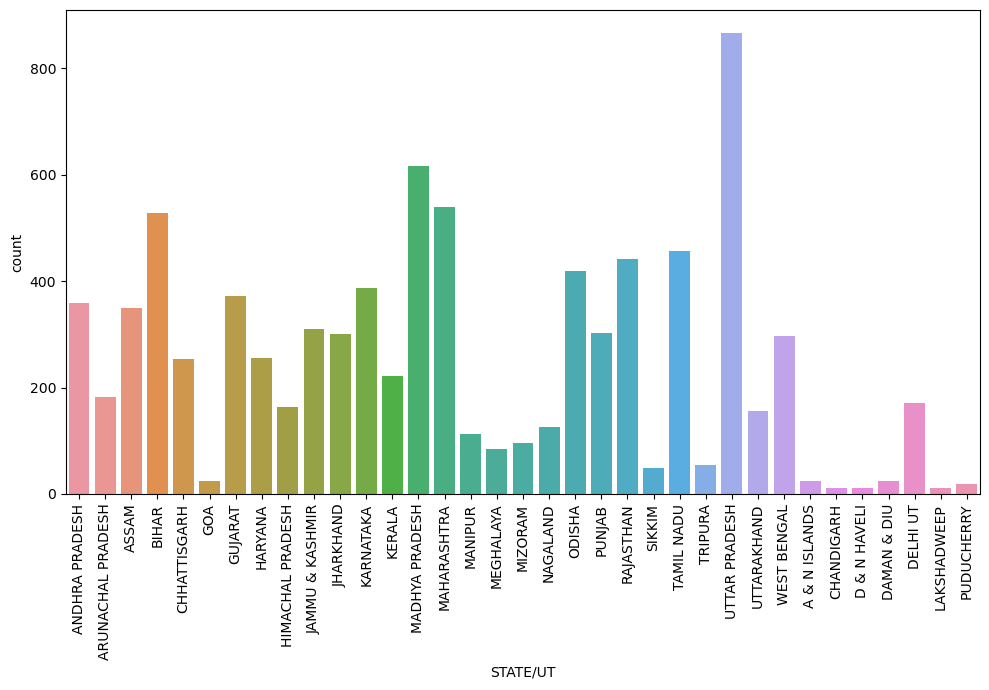

Countplot for YEAR column:->


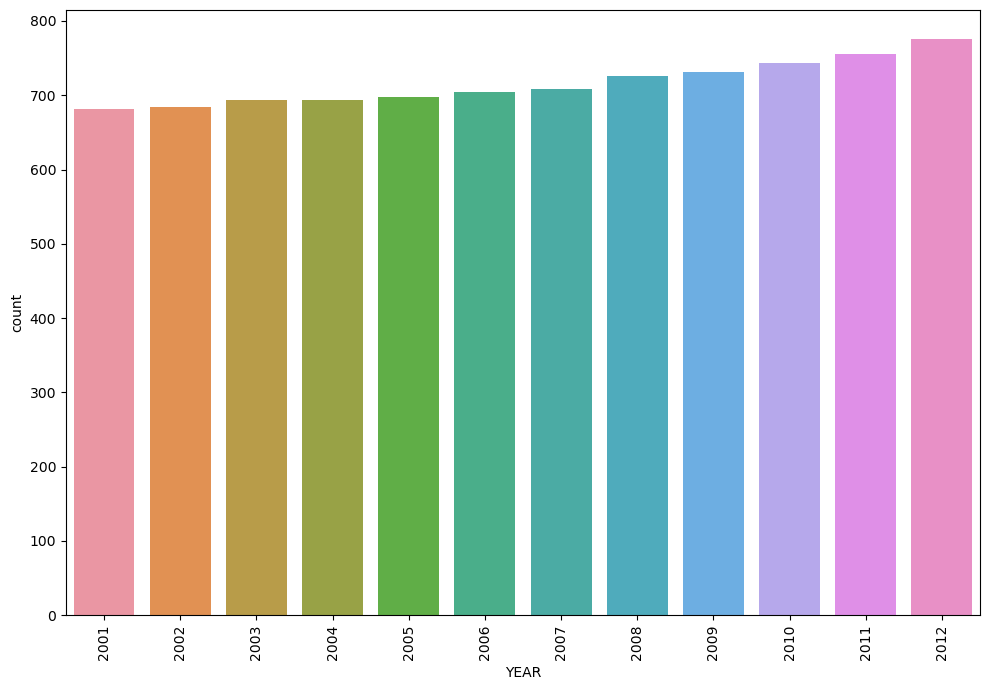

In [46]:
for i in sensitivearea[col1]:
    print("Countplot for {} column:->".format(i))
    generate_countplot(df[i])

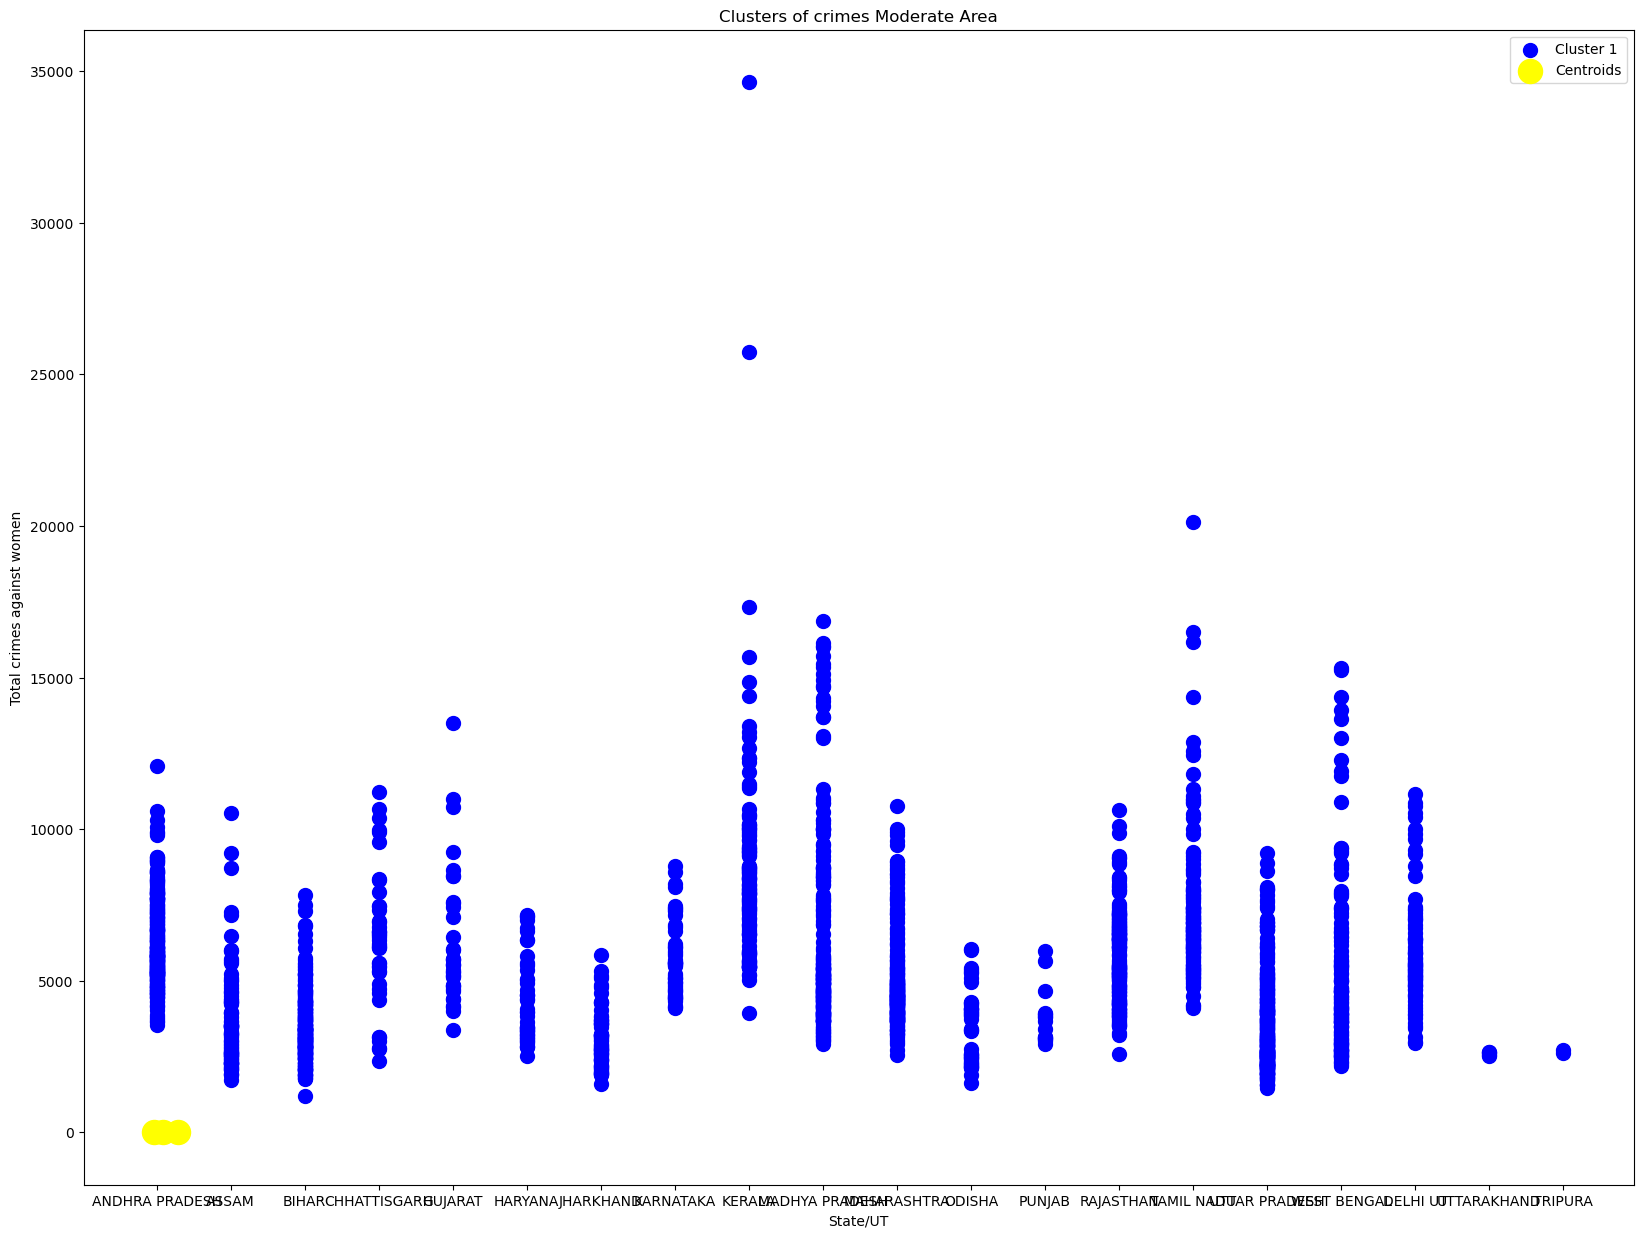

In [47]:
plt.figure(figsize=(20,15))
plt.scatter(moderatearea['STATE/UT'], moderatearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

4.3 Analyse your clusters and prepare a report that explains all your observations.

Analysis of Sensitive Area

In [48]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                         
ANDHRA PRADESH CYBERABAD   2006     43                 92         642   
                           2007     74                 84        1124   
                           2008     42                 66        1202   
                           2009     71                 84        1365   
                           2010     61                 84        1609   
...                                ...                ...         ...   
WEST BENGAL    KOLKATA     2012      0                154         659   
               MURSHIDABAD 2009     49                607         166   
                           2010     54                620         204   
                           2011     45                637         186   
                           2012     50                395         309   

                                 BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                          
ANDHRA PRADESH CYBERABAD   2006      1321                         1064   
                           2007      1165                         1188   
                           2008      1319                         1166   
                           2009      1348                         1063   
                           2010      1361                         1080   
...                                   ...                          ...   
WEST BENGAL    KOLKATA     2012        96                          507   
               MURSHIDABAD 2009        11                          269   
                           2010         7                          311   
                           2011        13                          290   
                           2012         4                          347   

                                 CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                             
ANDHRA PRADESH CYBERABAD   2006      1275               6   
                           2007      1192               5   
                           2008      1183               6   
                           2009      1174              13   
                           2010      1256              18   
...                                   ...             ...   
WEST BENGAL    KOLKATA     2012      2100              26   
               MURSHIDABAD 2009       220              12   
                           2010       170              30   
                           2011       189              27   
                           2012       157             110   

                                 CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                             
ANDHRA PRADESH CYBERABAD   2006                       156   
                           2007                       103   
                           2008                       103   
                           2009                       124   
                           2010                       173   
...                                                   ...   
WEST BENGAL    KOLKATA     2012                       428   
               MURSHIDABAD 2009                        39   
                           2010                        54   
                           2011                        96   
                           2012                        92   

                                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                              
ANDHRA PRADESH CYBERABAD   2006                                         11   
                           2007                                          8   
                           2008                                          3   
                           2009                                         15   
                           2010                                 

In [50]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()

crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

In [52]:
sensitivearea['STATE/UT'].value_counts()

MAHARASHTRA       24
ANDHRA PRADESH    19
WEST BENGAL       17
BIHAR             12
KARNATAKA         12
GUJARAT           11
UTTAR PRADESH     10
RAJASTHAN          6
MADHYA PRADESH     5
TAMIL NADU         2
DELHI UT           1
Name: STATE/UT, dtype: int64

In [53]:
sensitivearea['DISTRICT'].value_counts()

HYDERABAD CITY       12
BANGALORE COMMR.     12
PATNA                12
AHMEDABAD COMMR.     11
KOLKATA               9
PUNE COMMR.           8
CYBERABAD             7
MUMBAI COMMR.         7
LUCKNOW               6
JAIPUR                5
MUMBAI                5
INDORE                5
24 PARGANAS NORTH     4
THANE COMMR.          4
MURSHIDABAD           4
GHAZIABAD             2
CHENNAI               2
AGRA                  2
NORTH-WEST            1
ALWAR                 1
Name: DISTRICT, dtype: int64

In [54]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [55]:
sensitivearea_dis.first()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,WEST BENGAL,2008,192,168,47,192,0,192,317,215,...,234,67,209,5,1946,0,12,4973,11247,2
AGRA,UTTAR PRADESH,2011,181,182,38,76,0,76,395,328,...,411,87,196,0,341,0,515,2509,10290,2
AHMEDABAD COMMR.,GUJARAT,2002,222,143,0,12,0,12,153,92,...,1398,6,36,18,433,0,0,5953,14479,2
ALWAR,RAJASTHAN,2012,100,88,7,129,0,129,243,154,...,2612,47,135,0,655,0,503,2620,11941,2
BANGALORE COMMR.,KARNATAKA,2001,221,327,5,40,0,40,152,56,...,3735,40,223,51,229,0,38,11106,27254,2
CHENNAI,TAMIL NADU,2011,168,332,1,76,0,76,56,41,...,1466,20,73,121,229,0,1431,12464,21346,2
CYBERABAD,ANDHRA PRADESH,2006,193,92,11,60,0,60,166,90,...,3871,50,132,93,837,0,1064,2368,14226,2
GHAZIABAD,UTTAR PRADESH,2009,254,277,31,53,0,53,491,321,...,53,66,88,182,556,0,456,3123,11821,2
HYDERABAD CITY,ANDHRA PRADESH,2001,111,113,7,37,0,37,80,39,...,3137,24,118,27,746,0,409,1512,11831,2


In [56]:
sensitivearea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,119.0,2007.613445,3.405154,2001.0,2005.0,2008.0,2010.5,2012.0
MURDER,119.0,175.159664,95.781795,37.0,108.0,145.0,225.0,542.0
ATTEMPT TO MURDER,119.0,172.537815,138.386758,20.0,88.5,127.0,188.5,682.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,119.0,17.369748,31.180411,0.0,4.0,7.0,17.5,241.0
RAPE,119.0,92.302521,85.544968,12.0,46.0,65.0,93.5,568.0
CUSTODIAL RAPE,119.0,0.008403,0.091670,0.0,0.0,0.0,0.0,1.0
OTHER RAPE,119.0,92.294118,85.548019,12.0,46.0,65.0,93.5,568.0
KIDNAPPING & ABDUCTION,119.0,214.487395,129.965567,36.0,121.5,172.0,270.5,587.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,119.0,132.915966,107.889113,2.0,61.0,92.0,172.0,492.0
KIDNAPPING AND ABDUCTION OF OTHERS,119.0,81.571429,74.730087,7.0,35.0,61.0,92.0,484.0


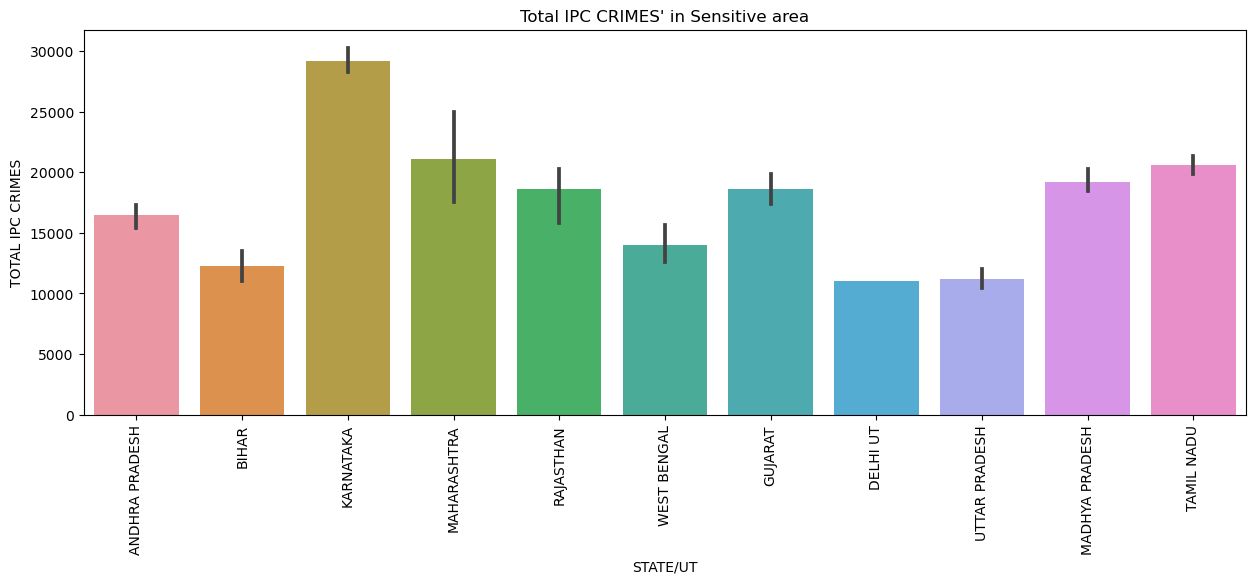

In [57]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

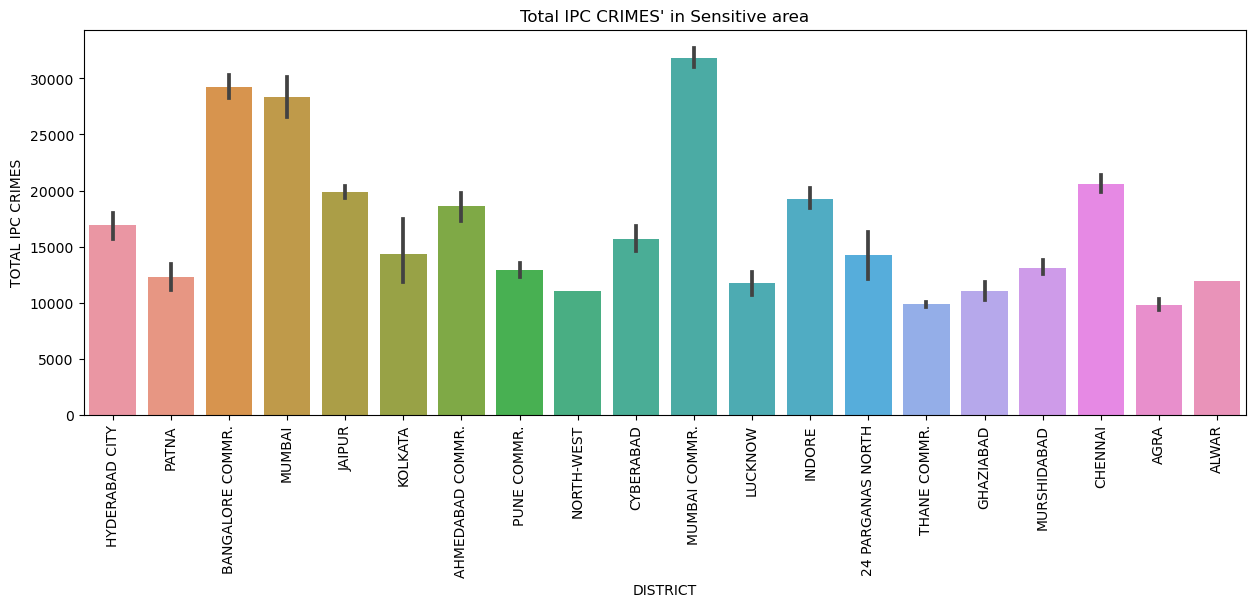

In [58]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.savefig('IPC CRIMES in Sensitive area.jpg')
plt.show()

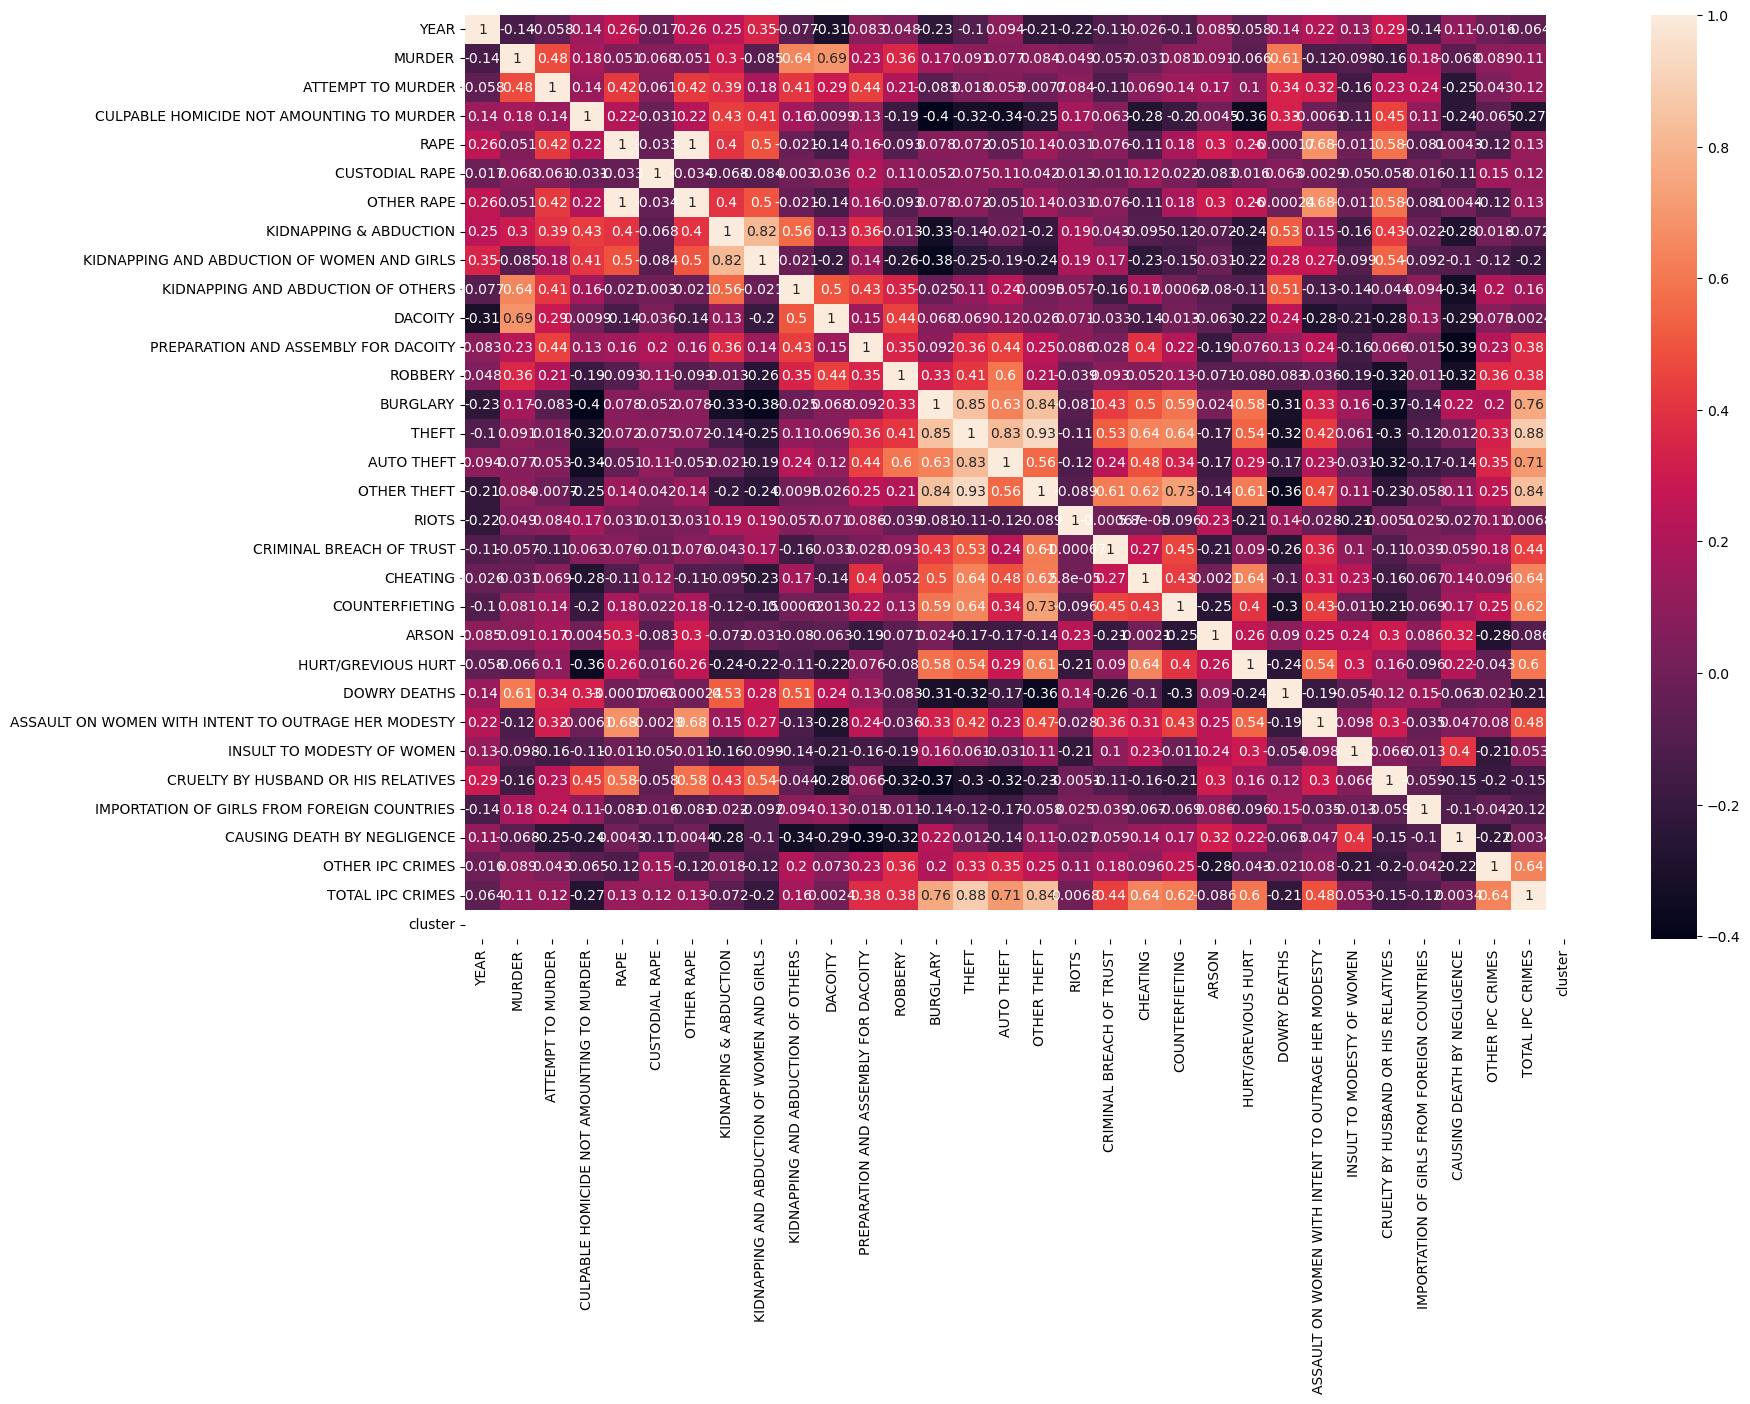

In [59]:
plt.figure(figsize=(18,12))
sns.heatmap(sensitivearea.corr(),annot=True)
plt.savefig('heatmap2.jpg')
plt.show()

In [65]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
               index = ['STATE/UT','DISTRICT', 'YEAR'],aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT       YEAR                                         
ANDHRA PRADESH ADILABAD       2001     30                 60          22   
                              2002     38                 79          32   
                              2003     42                 65          35   
                              2004     30                 83          46   
                              2005     30                 48          53   
...                                   ...                ...         ...   
WEST BENGAL    UTTAR DINAJPUR 2008     17                 98          53   
                              2009     11                 86          89   
                              2010     10                106         114   
                              2011     20                178         119   
                              2012     33                283         129   

                                    BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT       YEAR                                          
ANDHRA PRADESH ADILABAD       2001       198                          181   
                              2002       193                          225   
                              2003       207                          248   
                              2004       177                          271   
                              2005       191                          276   
...                                      ...                          ...   
WEST BENGAL    UTTAR DINAJPUR 2008        10                            5   
                              2009         8                            2   
                              2010         4                            2   
                              2011        10                            7   
                              2012         7                            3   

                                    CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT       YEAR                             
ANDHRA PRADESH ADILABAD       2001       104               1   
                              2002       135               0   
                              2003       146               1   
                              2004       152               5   
                              2005       173               4   
...                                      ...             ...   
WEST BENGAL    UTTAR DINAJPUR 2008        20              10   
                              2009        40               6   
                              2010        34               2   
                              2011        33               3   
                              2012        64               6   

                                    CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT       YEAR                             
ANDHRA PRADESH ADILABAD       2001                        16   
                              2002                        25   
                              2003                        19   
                              2004                        34   
                              2005                        13   
...                                                      ...   
WEST BENGAL    UTTAR DINAJPUR 2008                        14   
                              2009                         9   
                              2010                         9   
                              2011                        16   
                              2012                        18   

                                    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT       YEAR                                              
ANDHRA PRADESH ADILABAD       2001                                         17   
                              2002                                         17   
                              2003                     

In [64]:
moderatearea['STATE/UT'].value_counts()

UTTAR PRADESH     290
BIHAR             237
ANDHRA PRADESH    236
MAHARASHTRA       223
MADHYA PRADESH    220
RAJASTHAN         163
TAMIL NADU        134
WEST BENGAL       130
KERALA            127
ASSAM              86
DELHI UT           83
JHARKHAND          66
KARNATAKA          53
HARYANA            47
ODISHA             45
CHHATTISGARH       42
GUJARAT            37
PUNJAB             17
UTTARAKHAND         5
TRIPURA             2
Name: STATE/UT, dtype: int64

In [66]:
moderatearea['DISTRICT'].value_counts()

WEST            14
ADILABAD        12
AJMER           12
BHARATPUR       12
BHILWARA        12
                ..
RAJKOT RURAL     1
IDUKKI           1
WARDHA           1
BANKURA          1
CENTRAL          1
Name: DISTRICT, Length: 324, dtype: int64

In [67]:
moderatearea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,2243.0,2006.911725,3.532980,2001.0,2004.0,2007.0,2010.0,2012.0
MURDER,2243.0,85.699955,43.753410,4.0,56.0,78.0,107.0,324.0
ATTEMPT TO MURDER,2243.0,78.635756,63.015246,0.0,39.0,62.0,98.0,741.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,2243.0,10.125724,13.722244,0.0,2.0,5.0,14.0,148.0
RAPE,2243.0,52.641106,36.361907,2.0,29.0,44.0,65.0,369.0
CUSTODIAL RAPE,2243.0,0.007579,0.141470,0.0,0.0,0.0,0.0,5.0
OTHER RAPE,2243.0,52.633527,36.353471,2.0,29.0,44.0,65.0,369.0
KIDNAPPING & ABDUCTION,2243.0,84.366473,73.091034,1.0,36.0,65.0,106.0,577.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,2243.0,62.033883,56.784345,0.0,23.0,46.0,81.0,453.0
KIDNAPPING AND ABDUCTION OF OTHERS,2243.0,22.332590,28.649002,0.0,7.0,14.0,27.0,258.0


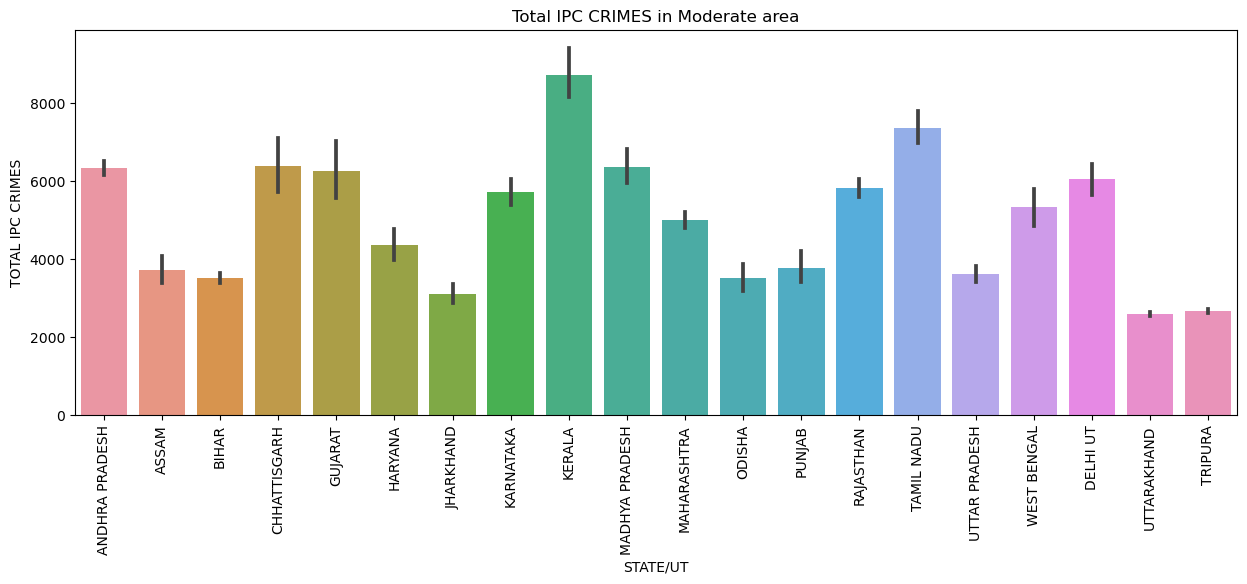

In [68]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()

In [69]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                         
ANDHRA PRADESH CYBERABAD   2006     43                 92         642   
                           2007     74                 84        1124   
                           2008     42                 66        1202   
                           2009     71                 84        1365   
                           2010     61                 84        1609   
...                                ...                ...         ...   
WEST BENGAL    KOLKATA     2012      0                154         659   
               MURSHIDABAD 2009     49                607         166   
                           2010     54                620         204   
                           2011     45                637         186   
                           2012     50                395         309   

                                 BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                          
ANDHRA PRADESH CYBERABAD   2006      1321                         1064   
                           2007      1165                         1188   
                           2008      1319                         1166   
                           2009      1348                         1063   
                           2010      1361                         1080   
...                                   ...                          ...   
WEST BENGAL    KOLKATA     2012        96                          507   
               MURSHIDABAD 2009        11                          269   
                           2010         7                          311   
                           2011        13                          290   
                           2012         4                          347   

                                 CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                             
ANDHRA PRADESH CYBERABAD   2006      1275               6   
                           2007      1192               5   
                           2008      1183               6   
                           2009      1174              13   
                           2010      1256              18   
...                                   ...             ...   
WEST BENGAL    KOLKATA     2012      2100              26   
               MURSHIDABAD 2009       220              12   
                           2010       170              30   
                           2011       189              27   
                           2012       157             110   

                                 CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                             
ANDHRA PRADESH CYBERABAD   2006                       156   
                           2007                       103   
                           2008                       103   
                           2009                       124   
                           2010                       173   
...                                                   ...   
WEST BENGAL    KOLKATA     2012                       428   
               MURSHIDABAD 2009                        39   
                           2010                        54   
                           2011                        96   
                           2012                        92   

                                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                              
ANDHRA PRADESH CYBERABAD   2006                                         11   
                           2007                                          8   
                           2008                                          3   
                           2009                                         15   
                           2010                                 

In [70]:
peacefularea['STATE/UT'].value_counts()

UTTAR PRADESH        566
MADHYA PRADESH       391
ODISHA               373
GUJARAT              324
KARNATAKA            322
TAMIL NADU           321
JAMMU & KASHMIR      310
MAHARASHTRA          293
PUNJAB               285
BIHAR                279
RAJASTHAN            273
ASSAM                264
JHARKHAND            234
CHHATTISGARH         212
HARYANA              209
ARUNACHAL PRADESH    183
HIMACHAL PRADESH     164
UTTARAKHAND          151
WEST BENGAL          150
NAGALAND             126
MANIPUR              113
ANDHRA PRADESH       103
MIZORAM               96
KERALA                94
DELHI UT              87
MEGHALAYA             84
TRIPURA               53
SIKKIM                48
GOA                   24
A & N ISLANDS         24
DAMAN & DIU           24
PUDUCHERRY            19
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: STATE/UT, dtype: int64

In [71]:
peacefularea['DISTRICT'].value_counts()

G.R.P.           45
NORTH            36
RAILWAYS         35
SOUTH            25
BALRAMPUR        24
                 ..
RAILWAYS KMR      1
DEWAS             1
WARANGAL          1
CRIME KASHMIR     1
CAR               1
Name: DISTRICT, Length: 674, dtype: int64

In [72]:
peacefularea.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,6235.0,2006.517241,3.431929,2001.0,2004.0,2006.0,2009.0,2012.0
MURDER,6235.0,30.388773,23.026563,0.0,12.0,27.0,43.0,201.0
ATTEMPT TO MURDER,6235.0,24.870088,25.264792,0.0,6.0,18.0,35.0,269.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,6235.0,3.181235,5.890935,0.0,0.0,1.0,3.0,73.0
RAPE,6235.0,17.655012,17.262160,0.0,5.0,13.0,25.0,139.0
CUSTODIAL RAPE,6235.0,0.001283,0.035800,0.0,0.0,0.0,0.0,1.0
OTHER RAPE,6235.0,17.653729,17.262218,0.0,5.0,13.0,25.0,139.0
KIDNAPPING & ABDUCTION,6235.0,22.790537,22.589793,0.0,6.0,16.0,33.0,177.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,6235.0,17.473617,19.577894,0.0,3.0,11.0,25.0,146.0
KIDNAPPING AND ABDUCTION OF OTHERS,6235.0,5.316921,7.229850,0.0,1.0,3.0,7.0,104.0


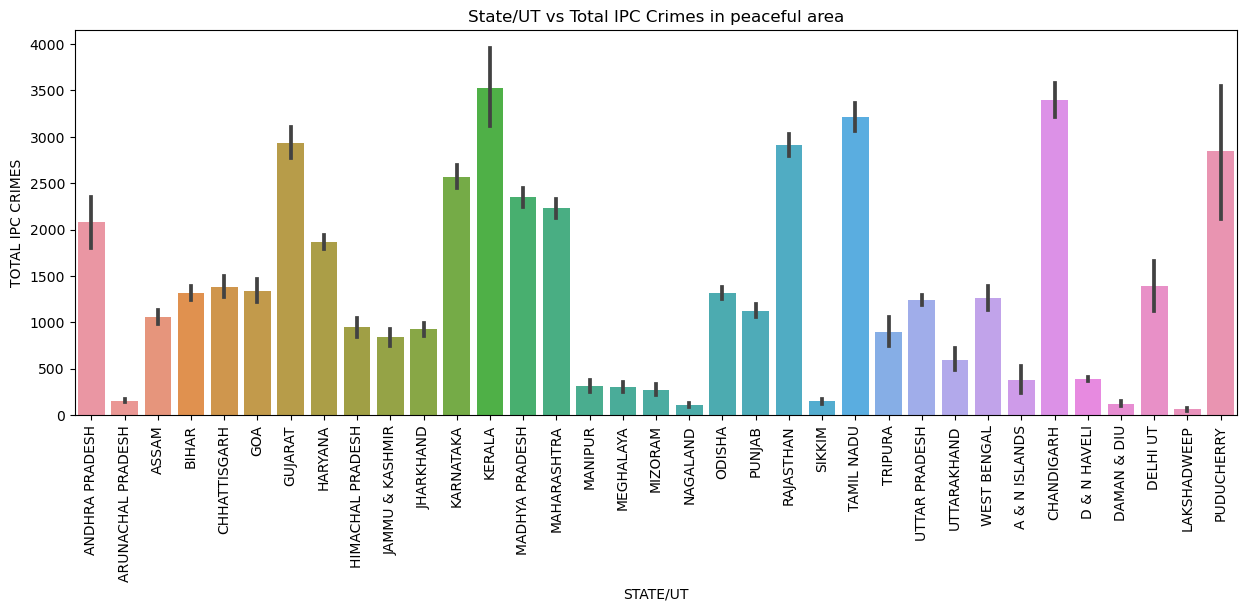

In [73]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation='90')
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()

4.3"Analyse your clusters and prepare a report that explains all your observations.

States in Sensitve area- Total rows 140 and columns 32.

As per this Cluster Crimes are the highest in every state. __West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu __has shown more crime against any categories.Means these are the states which are not that much safe and are highly prone to crimes .

DISTRICTS LIKE HYDERABAD CITY,AHMEDABAD COMMR, BANGALORE COMMR. ,PATNA , KOLKATA , CYBERABAD ,LUCKNOW PUNE COMMR. ,MUMBAI COMMR. ,24 PARGANAS NORTH INDORE , 24 PARGANAS SOUTH ,THANE COMMR. , JAIPUR ,MUMBAI , MURSHIDABAD ,NORTH-WEST,NADA,AGRA ,CHENNAI ,GHAZIABAD ,SOUTH ,JALPAIGURI ,KANPUR NAGAR ,NORTH WEST ,ALWAR Are the Districts which are not safe.

As we can See the States Like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu are the larger States Population wise and Area wise as well. Population is one of the important factors influencing incidence of crime. A number of socio-economic factors, besides population, could influence the crime situation at a particular place. The present analysis of crime rate is restricted to the influence of population only.

States in Moderate area- Total 2350 Rows and 33 Columns-

As per this Cluster Moderate area is that area where Crimes are less than Sensitive area but higher than Peaceful area,

States West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan Madhya Pradesh,Delhi Ut, Tamil Nadu are still showing higher crimes in every categories, But the states like Tripura, Punjab, Jharkhand, Odisha , Haryana , Jammu & Kashmir are also present in this dtaset which showing moderate crimes in each category.

States in Peaceful area- Total 6106 Rows and 33 Columns-

As per this Cluster Peaceful area is that area where Crimes are less than both Sensitive and Moderate area.

Whene ever there is higher crime showing in each category we found the states like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat ,Karnataka Rajasthan are showing higher crime values. But in lesser cimes States like Mizoram, Tripura, Manipur,GOA, Assam , Arunachal Pradesh, Sikkim,Nagaland,Uttarakhand,Daman & Diu, Dadar and Nagar Haveli, A7 N Islands, Puducheery, Chandigarh, Lakshdweep (Union Territories ) started showing data.
Peacefularea is the dataframe which consist of Lowest crimes count in each category of crime so when we analyzed each crime we saw entries from States which are having the lowest crimes.
As per the analysis of above clusters-

Sensitive States- Maharashtra, Rajasthan, Uttar Pradesh, DELHI,West Bengal, Tamil Nadu, Andhra Pradesh, Madhya Pradesh, Bihar.
Moderate States- Uttarakhand, Kerala, Goa,Jharkhand, Karnataka,Chhatisgarh, Haryana, Himachal Pradesh
Peaceful States - Sikkim, Mizoram ,Tripua, Manipur, Assam,Nagaland, A &N Islands, Lakshdweep,Meghlaya,Arunachal Pradesh

Literacy can make any country better so if we educate more people around us we can stop these crimes day by day andcan make our Country a better place to live.

Schemes Indian Government, at all levels, announced Welfare Schemes for a cross section of the society from time to time. These schemes could be either Central, State specific or a joint collaboration between the Centre and the States.By Encouraging people to join these programs can help people to become beeter in life.

Many women and child development schemes has benn announced like- Women's Empowerment and Gender Equity.POSHAN Abhiyaan.,Anganwadi Services.,Pradhan Mantri Matru Vandana Yojana (PMMVY) ,Beti Bachao Beti Padhao (BBBP) ,One Stop Centre (OSC) and Universalization of Women Helplines(WHL),hild Protection Services (CPS),Scheme for Adolescent Girls (SAG) so women of Rural area are also should be encouraged to join these programs.

4.4   Capstone project overall story in your own words. Min 1000 words.

In this project the main task was to get to know the areas which areas would be in sensitive area's, moderate area's & peacefull area's for the crimes happened around the country. In the first phase the task given was to collect data for important attributes such as the population of various states, the literacy rate around the states of the country & the area of the states. The Population & the literacy are two of the most important attributes which affects the crimes in the states & it's districts. Another important attribute for which the data was collected was the area of the states. Once all of them were collected the analysis of the same was done and phase 1 was completed.

In phase 2 the analysis of the collected data was done with the files provided through various analysis such as literacy rate vs the crime rate, year on year crime rate, over all crime rate, analysis of population vs the crime rate. After doing all the analysis which was asked in the phase the report of crime for each state for each year was done and the analysis was completed & phase 2 was completed.

In phase 3 the SQL operations were asked and through it various results such as highest number of murders or highest number of rapes were seen. And the analysis was done through running the SQL queries. In phase 4 there various cluster we asked to be made 1 ) Peacefull area 2) Moderate area & 3) sensitive area. Peacefull area sugessts the area where are crime are very less, moderate area means the area where the crimes are at certain level & are to be noticed by govt. officials & sensitive area sugessts the area which have the very high crime rates and are to be monitered vert highly through govt.

Through this overall project it is clearly understood that the literacy rate & the population plays a vital role in controlling the crime rate over all around the country. If the Population is properly managed the crime rate gets directly affected as the population affects in high poverty rate around the country and if people around the country are in poverty the crime would definatly increase. So all the things inter correlated to each other. If the Population & Literacy is managed properly it will siginificantly help in reducing the crime rate around the country.